Consider the data present in the Insurance dataset file.<br>
Following is the attribute related information:<br><br>

age: age of primary beneficiary<br>
sex: insurance contractor gender, female, male<br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
children: Number of children covered by health insurance / Number of dependents<br>
smoker: Smoking, yes or no<br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
charges: Individual medical costs billed by health insurance<br><br>

Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create a dataframe named "data" from the given datafile and print it's head

In [222]:
data=pd.read_csv(r"C:\Python Imarticus\Basics\Assignments\Insurance_Data_Linear_Regression\datasets_insurance.csv",header=0)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Understand the problem statement and the data, try understanding importance of each variable given.<br>
Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [223]:
print(data.shape)
print(data.dtypes)
print(data.describe())

(1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Check if there are missing values. If yes, handle them.

In [224]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Check for Assumption 1- There should be no outliers in the data.<br>
Hint: Think logically, nothing needs to be worked upon here.

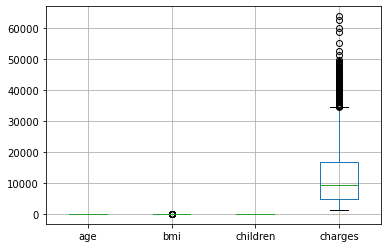

In [225]:
import matplotlib.pyplot as plt
colname=[]
for x in data.columns:
    if data[x].dtype=="int64" or data[x].dtype=="float64":
        colname.append(x)

for x in colname:
    data.boxplot(column=x)
    plt.show()

Check for Assumption 2-Assumption of Linearity<br>
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

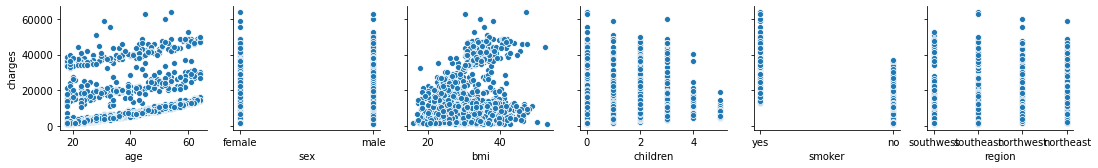

In [226]:
sns.pairplot(data, x_vars=['age','sex','bmi','children','smoker','region'],y_vars="charges",kind='scatter')

Create X and Y

In [227]:
X=data[['age','sex','bmi','children','smoker','region']]
Y=data['charges']

Check for Assumption 3-Assumption of Normality <br>
Hint: You will find the data is highly positively skewed. So log transform the data.

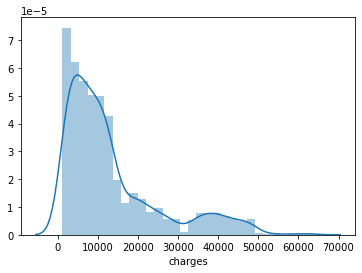

In [228]:
sns.distplot(Y,hist=True)

In [229]:
Y_log=np.log(Y)


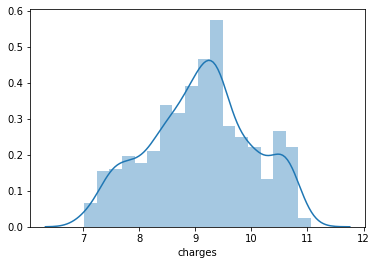

In [230]:
sns.distplot(Y_log,hist=True)

Convert Categorical variables to numerical- Sex, Smoker and Region<br>
Hint: Make use of map function. Refer to clustering code file.<br>
Sex: Female-0,Male-1<br>
Smoker: No-0, Yes-1<br>
Region: northeast-0,northwest-1,southeast-2,southwest-3

In [231]:
X.sex=X.sex.map({"female":0,"male":1})

C:\Users\Neeharika\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [232]:
X.smoker=X.smoker.map({"no":0,"yes":1})

In [233]:
X.region=X.region.map({"northeast":0,"northwest":1,"southeast":2,"southwest":3})

In [234]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


Check for the normality in the X variables. <br>
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018601966A48>,
      dtype=object)

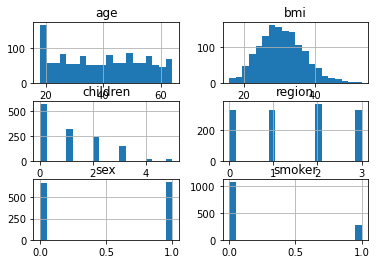

In [235]:
X.hist(bins=20)

In [236]:
from scipy.stats import skew
data_num_skew = X.apply(lambda x: skew(x.dropna())) 
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)] 

print(data_num_skew)
print(data_num_skewed)




age         0.055610
sex        -0.020928
bmi         0.283729
children    0.937328
smoker      1.463124
region     -0.038058
dtype: float64
children    0.937328
smoker      1.463124
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001860197BE88>,
      dtype=object)

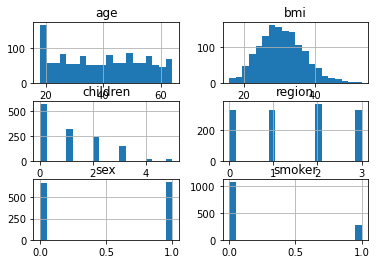

In [237]:
X.hist(bins=20)

Check for Assumption 4-No multicollinearity in the data<br>
Try both the approaches-correlation and VIF.<br>
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000


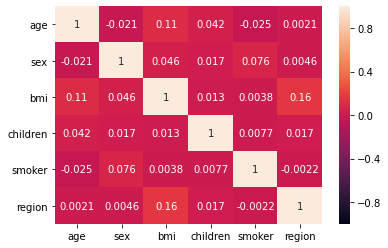

In [238]:
corr_df=X.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [239]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)


,features,VIF Factor
0,age,7.55
1,sex,2.00
2,bmi,10.37
3,children,1.80
4,smoker,1.26
5,region,2.92


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_log,test_size=0.3,random_state=10)

In [187]:
print(X_train.shape)
print()
print(Y_train.shape)
print()
print(X_test.shape)
print()
print(Y_test.shape)

(936, 6)

(936,)

(402, 6)

(402,)


Build a base Linear Regression model using sklearn.

In [188]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [189]:
print(lm.intercept_)
print(lm.coef_)

7.042446402415639
[ 0.0352433  -0.07018148  0.0111782   0.09942699  1.56899189 -0.04278656]


Create a zipped list of the slope coefficients to understand the equation better.<br>
Write down the equation manually and try making sense out of it.

In [190]:
print(list(zip(X.columns,lm.coef_)))

[('age', 0.03524330025172184), ('sex', -0.07018148219835638), ('bmi', 0.011178196909999202), ('children', 0.09942698608802106), ('smoker', 1.5689918884084277), ('region', -0.042786564146527574)]


Predict using the model.

In [191]:
Y_pred=lm.predict(X_test)

Evaluate the model.

In [192]:
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7374526728907583
0.4535666465554725
0.7362691387339924


Perform Ridge and Lasso regression. Evaluate them as well.<br>
Hint:Look at the fun in the Lasso Regression, ignore such model.

### Ridge Regression

In [240]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_log,test_size=0.3,random_state=10)

In [241]:
from sklearn.linear_model import Ridge
lm=Ridge()
lm.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [242]:
print(lm.intercept_)
print(lm.coef_)

7.044356761111713
[ 0.03524083 -0.06922454  0.01118039  0.09925573  1.55870554 -0.04282443]


In [243]:
Y_pred=lm.predict(X_test)

In [244]:
from sklearn.metrics import r2_score,mean_squared_error


r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7376888175484464
0.45336262346262673
0.7365063479055394


### Lasso Regression

In [198]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_log,test_size=0.3,random_state=10)

In [199]:
from sklearn.linear_model import Lasso
lm=Lasso()
lm.fit(X_train,Y_train)
print(lm.intercept_)
print(lm.coef_)

7.8888757936390075
[ 0.03086241  0.          0.          0.          0.         -0.        ]


In [200]:
Y_pred=lm.predict(X_test)

In [201]:
from sklearn.metrics import r2_score,mean_squared_error


r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.23329039397987605
0.775091121979927
0.229834152329898


Create a sample dataframe named "new_df" to hold just the training data for the statsmodels model.

In [202]:
new_df=pd.DataFrame()
new_df=X_train

new_df["charges"]=Y_train
new_df.shape

C:\Users\Neeharika\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(936, 7)

In [203]:
new_df.head()

,age,sex,bmi,children,smoker,region,charges
428,21,0,16.815,1,0,0,8.060684
226,28,1,38.060,0,0,2,7.897109
867,57,1,43.700,1,0,3,9.356700
397,21,1,31.020,0,0,2,9.716344
300,36,1,27.550,3,0,0,8.816815


Build OLS model using statsmodels library. Check the summary to evaluate.<br>
Hint: No high p-values. <br>
Check for the Assumption 5- No autocorrelation 

In [204]:
import statsmodels.formula.api as sm
lm_model = sm.ols(formula='charges ~ age + sex + bmi+children+smoker+region', data=new_df).fit()
print(lm_model.params)
print(lm_model.summary())

Intercept    7.042446
age          0.035243
sex         -0.070181
bmi          0.011178
children     0.099427
smoker       1.568992
region      -0.042787
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     542.9
Date:                Mon, 03 Aug 2020   Prob (F-statistic):          1.32e-299
Time:                        16:43:40   Log-Likelihood:                -559.06
No. Observations:                 936   AIC:                             1132.
Df Residuals:                     929   BIC:                             1166.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

Predict using the model. Evaluate the model.

In [205]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.737452672890758
0.45356664655547285
0.7362691387339921


Check for Assumption 6-Errors should be random.<br>
Hint: Diagnostic plot

Text(0, 0.5, 'Residuals')

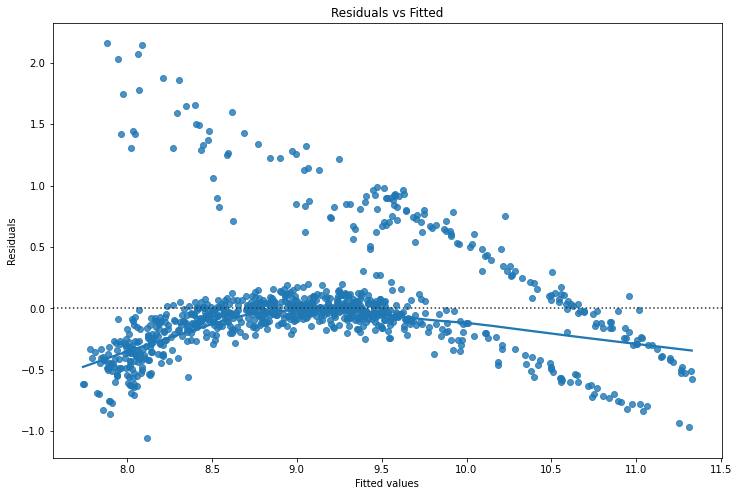

In [206]:
import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
model_fitted_y = lm_model.fittedvalues
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'charges', data=new_df, lowess=True)
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

Check for Assumption 7-Errors should follow normal distribution.<br>
Hint: Diagnostic plot

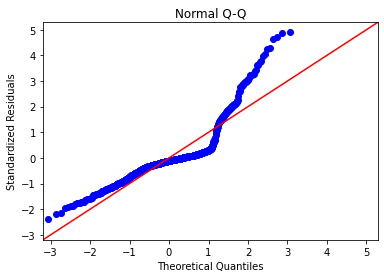

In [207]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

Check for Assumption 8-Errors should folllow constant variance.<br>
Hint: Diagnostic plot

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

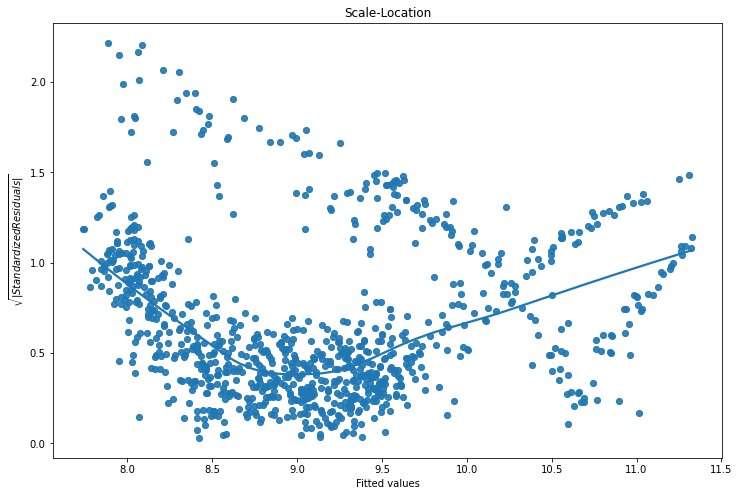

In [208]:
model_norm_residuals = lm_model.get_influence().resid_studentized_internal

model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

Scale the data using Standard Scaler to prepare it for SGD.

In [209]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [210]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_log,test_size=0.3,random_state=10)

Build the SGDRegressor.

In [218]:
from sklearn.linear_model import SGDRegressor

lm_SGD = SGDRegressor(learning_rate="constant",eta0=0.00001,shuffle=True,random_state=10,max_iter=2000,
early_stopping=True,n_iter_no_change=5)
lm_SGD.fit(X_train,Y_train)


print (lm_SGD.intercept_)
print (lm_SGD.coef_)

[9.06492646]
[ 0.4885976  -0.04282211  0.07921517  0.11984326  0.63890314 -0.05777812]


In [219]:
print(lm_SGD.n_iter_) 
print(lm_SGD.t_) 

673
629929.0


Predict using the model. Evaluate the model. Perform trial and error to reach the optimum model.

In [220]:
Y_pred_new=lm_SGD.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7362138238588862
0.45463548112328134
0.735024705108438


Write down your conclusion as to which is the final model that you would go with along with the reasons.

In [97]:
'''Ridge Regression is better due to better metrics
ridge

0.7376888175484464
0.45336262346262673
0.7365063479055394

linear

0.7374526728907583
0.4535666465554725
0.7362691387339924

stats

0.737452672890758
0.45356664655547285
0.7362691387339921

SGD

0.7362138238588862
0.45463548112328134
0.735024705108438

'''

'Ridge Regression is better due to better metrics\n 0.7329836944355982\n0.45741057560700715\n0.7317800146208826 compared to SGD'

Once finalized the model, try predicting the following observations for me.<br>
Create the dataframe named "X_test_sample" using the given dictionary object.<br>

sample_data={"age":[56,51,31,64,44,43,56],
             "sex":[1,0,1,1,0,1,1],
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}





In [221]:
sample_data={"age":[56,51,31,64,44,43,56], "sex":[1,0,1,1,0,1,1], "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}
X_test_sample=pd.DataFrame(sample_data)
X_test_sample

,age,sex,bmi,children,smoker,region
0,56,1,19.950,0,1,0
1,51,0,18.050,0,0,1
2,31,1,34.390,3,1,1
3,64,1,25.600,2,0,3
4,44,0,23.980,2,0,2
5,43,1,32.600,2,0,3
6,56,1,33.725,0,0,1


In [245]:
Y_pred_manual=lm.predict(X_test_sample)

In [246]:
Y_pred_manual=np.exp(Y_pred_manual)

In [247]:
print(Y_pred_manual)

[45723.73399466  8108.11331438 28731.22202506 14571.18484423
  7910.30349119  7517.6327568  10752.06017639]


The predicted values would be log transformed.Convert them back to original values.<br>
Hint: Use np.exp()

In [248]:
Y_pred=np.exp(Y_pred)

Save the predicted values along with the observations into an excel file.

In [249]:
Y_test=np.exp(Y_test)

In [250]:
print(Y_test)

7        7281.50560
999      5267.81815
1209    12347.17200
491     24513.09126
625      3736.46470
           ...     
854     24106.91255
554     17878.90068
1278    22462.04375
374      1391.52870
6        8240.58960
Name: charges, Length: 402, dtype: float64


In [251]:
predicted_insurance_df=pd.DataFrame(X_test)
predicted_insurance_df['Actual charges']=Y_test
predicted_insurance_df['Predicted charges']=Y_pred

In [252]:
predicted_insurance_df.shape

(402, 8)

In [254]:
predicted_insurance_df.sex=predicted_insurance_df.sex.map({0:"female",1:"male"})
predicted_insurance_df.smoker=predicted_insurance_df.smoker.map({0:"no",1:"yes"})
predicted_insurance_df.region=predicted_insurance_df.region.map({0:"northeast",1:"northwest",2:"southeast",3:"southwest"})

In [255]:
predicted_insurance_df.to_excel(r"C:\Python Imarticus\Basics\Assignments\Insurance_Data_Linear_Regression\Insurance_Data_Prediction.xlsx",header=True,index=False)

In [256]:
predicted_insurance_df.head()

,age,sex,bmi,children,smoker,region,Actual charges,Predicted charges
7,37,female,27.740,3,no,northwest,7281.50560,7430.541885
999,36,female,26.885,0,no,northwest,5267.81815,5275.278810
1209,59,male,37.100,1,no,southwest,12347.17200,12580.657729
491,61,female,25.080,0,no,southeast,24513.09126,11953.775413
625,29,female,26.030,0,no,northwest,3736.46470,4082.814240
